# import

In [1]:
!pip install keras-bert
!pip install keras-radam

  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=5a80d6e2bc8d62802b526fcaa2e840e6e8f5c525d163bbc968aeecd4b243c3af
  Stored in directory: /root/.cache/pip/wheels/bd/27/da/ffc2d573aa48b87440ec4f98bc7c992e3a2d899edb2d22ef9e
  Created wheel for keras-transformer: filename=keras_transformer-0.32.0-cp36-none-any.whl size=13266 sha256=481f3c92e63cc1a22ddf9cf0fbd84a610f25c5e6751d0bc7174f038e297e3c1a
  Stored in directory: /root/.cache/pip/wheels/62/f0/ce/82fa5d024d5ef8e263f26a50dcee23820efe245680ce9c922a
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7554 sha256=d3f5942c797842a4d2fb899e4b4ea06a400b3d55a8d12cf81c231639427bbf50
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.22.0-cp36-none-any.whl size=15371 sha256=96eb7daad99ae0b22877533a3fa273b1d2946379f195ecbea4d1f9ccb1651f2f
  Stor

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
os.chdir('/content/drive/My Drive')
os.getcwd()

'/content/drive/My Drive'

In [0]:
path = '/content/drive/My Drive'

In [5]:
# wget을 활용해서 bert 모델 다운로드 가능
import os
!wget https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip

if "bert" not in os.listdir():
  os.makedirs("bert")
else:
  pass

import zipfile
import shutil
         
bert_zip = zipfile.ZipFile('multi_cased_L-12_H-768_A-12.zip')
bert_zip.extractall('bert')
 
bert_zip.close()

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

copytree("bert/multi_cased_L-12_H-768_A-12", "bert")

--2020-04-23 08:39:38--  https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662903077 (632M) [application/zip]
Saving to: ‘multi_cased_L-12_H-768_A-12.zip.4’

multi_cased_L-12_H- 100%[===================>] 632.19M  53.8MB/s    in 11s     

2020-04-23 08:39:51 (56.2 MB/s) - ‘multi_cased_L-12_H-768_A-12.zip.4’ saved [662903077/662903077]



In [6]:
os.listdir('bert')

['multi_cased_L-12_H-768_A-12',
 'bert_model.ckpt.meta',
 'vocab.txt',
 'bert_model.ckpt.index',
 'bert_config.json',
 'bert_model.ckpt.data-00000-of-00001']

In [7]:
%tensorflow_version 1.x
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.ERROR)

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import seaborn as sns
import re
import pickle

import keras as keras
from keras.models import load_model
from keras import backend as K
from keras import Input, Model
from keras import optimizers
from keras.utils import to_categorical
from keras.utils import model_to_dot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps

from keras_radam import RAdam

import codecs
from tqdm import tqdm
import shutil

from IPython.display import SVG

import time


TensorFlow 1.x selected.


Using TensorFlow backend.


# 데이터 로드 및 처리

In [8]:
df = pd.read_csv('/content/drive/My Drive/[핀테크 과정] 머신러닝 팀플/딥러닝/glowpick_end.csv')
df.head()

product  ...                                              index
0  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...  [753, 7, 75, 40, 234, 1561, 361, 370, 60, 714,...
1  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...  [39, 18, 491, 228, 173, 42, 36, 7, 531, 686, 5...
2  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...       [44, 46, 144, 51, 163, 4856, 127, 188, 1142]
3  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...  [937, 145, 78, 44, 46, 144, 424, 108, 3, 1237,...
4  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...  [27, 41, 184, 1, 186, 288, 110, 998, 44, 46, 1...

[5 rows x 12 columns]

In [0]:
#to_categorical 함수는 max값으로 카테고리 몇개있는지 인식하고 0부터 인식하기 때문에, 1~5있으면 6개 category있는 걸로 오해함.

df['label'] = df['rating'] -1

In [10]:
df.head()

product  ... label
0  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3
1  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3
2  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3
3  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3
4  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3

[5 rows x 13 columns]

In [0]:
df.dropna(axis=0, how='any',inplace=True)

In [12]:
df.head()

product  ... label
0  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3
1  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3
2  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3
3  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3
4  소프트 에어리 UV 에센스 [SPF50+/PA++++]  ...     3

[5 rows x 13 columns]

In [0]:
y = df['label']
X = df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, shuffle=True, stratify=y)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.2, random_state=99, shuffle=True, stratify=y_train)

In [0]:
SEQ_LEN = 128

pretrained_path ="bert"
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

DATA_COLUMN = "pre_review"
LABEL_COLUMN = "label"

In [0]:
def convert_data(data_x, data_y):
    # make indices
    col_index = data_x.columns.get_loc("index")
    indices=[]

    for i in range(len(data_x)):
      a = data_x.iloc[i, col_index]
      b = a.strip('[]')
      c = b.split(',')
      blank_list = []
      for j in range(SEQ_LEN):
        try:
            num = float(c[j])
        except:
            num=0
        blank_list.append(num)
      indices.append(blank_list)
        
    print(indices)
    targets = data_y
    items = list(zip(indices, targets))
    indices, targets = zip(*items)
    targets = to_categorical(targets,5)  # 이부분 개수 ㅠ
    indices = np.asarray(indices)
    
    return [indices, np.zeros_like(indices)], np.array(targets)

- 사전학습된 버트 모델의 인풋은 문장 토큰화가 숫자로 바뀐 것과, 앞문장인지 뒷문장인지 알려주는 문장 순서 벡터가 들어갑니다. 우리는 문장 하나를 가지고만 훈련할 것이므로 순서 벡터는 모두 0으로 통일합니다.

- 그리고 파인튜닝 시에는 문장 안에 일부 단어를 가리는 마스킹은 사용하지 않습니다.

In [18]:
train_x, train_y = convert_data(X_train, y_train)
val_x, val_y = convert_data(X_val, y_val)
test_x, test_y = convert_data(X_test, y_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
train_y.shape

(34297, 5)

# 모델 로드 및 설정

In [0]:
############### 레이어 개수 설정 + 사전훈련된 모델 로드 ################
layer_num = 12
model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training=True,
    trainable=True,
    seq_len=SEQ_LEN)

모델의 구조를 확인합니다.  
총 12층의 트랜스포머 계층이 있음을 확인할 수 있습니다.


In [0]:
#model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 128)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 128, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 128, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [0]:
def get_bert_finetuning_model(model):
  inputs = model.inputs[:2]
  dense = model.layers[-3].output


  outputs = keras.layers.Dense(5, activation='softmax',kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),  ## 2로 바꿔줌
                              name = 'real_output')(dense)

  bert_model = keras.models.Model(inputs, outputs)
  bert_model.compile(
      optimizer=RAdam(learning_rate=0.00001, weight_decay=0.0025),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
  
  return bert_model

**모델의 FLOW를 확인해 보도록 하겠습니다.**

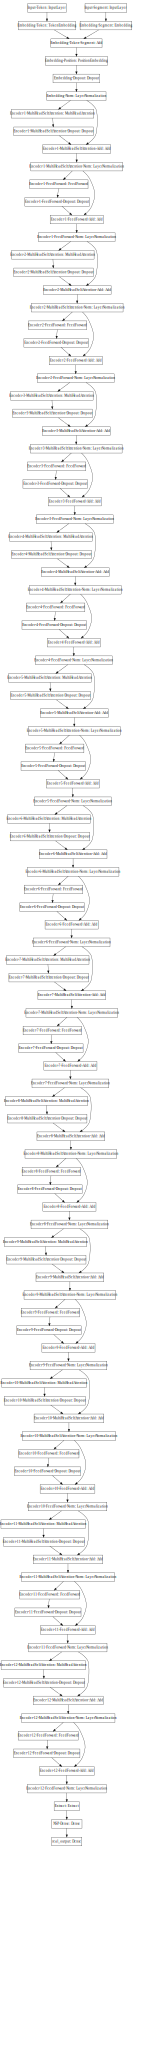

In [0]:
SVG(model_to_dot(get_bert_finetuning_model(model), dpi=65).create(prog='dot', format='svg'))

# 1) epoch =5

In [22]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init = tf.variables_initializer([v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables])
sess.run(init)

bert_model = get_bert_finetuning_model(model)
history = bert_model.fit(train_x, train_y, epochs=5, batch_size=16, verbose = 1, validation_data=(val_x, val_y), shuffle=True)

Train on 34297 samples, validate on 8575 samples
Epoch 1/5
34297/34297 [==============================] - 2330s 68ms/step - loss: 1.2831 - accuracy: 0.4056 - val_loss: 1.1477 - val_accuracy: 0.4715
Epoch 2/5
34297/34297 [==============================] - 2312s 67ms/step - loss: 1.1013 - accuracy: 0.5012 - val_loss: 1.0499 - val_accuracy: 0.5250
Epoch 3/5
34297/34297 [==============================] - 2313s 67ms/step - loss: 0.9851 - accuracy: 0.5647 - val_loss: 1.0342 - val_accuracy: 0.5391
Epoch 4/5
34297/34297 [==============================] - 2313s 67ms/step - loss: 0.8779 - accuracy: 0.6156 - val_loss: 1.0759 - val_accuracy: 0.5266
Epoch 5/5
34297/34297 [==============================] - 2312s 67ms/step - loss: 0.7674 - accuracy: 0.6713 - val_loss: 1.1742 - val_accuracy: 0.5245


In [0]:
bert_model.save_weights(path+"/bert_1-5_epoch5_batch16.h5")

In [25]:
os.listdir(path)

['multi_cased_L-12_H-768_A-12.zip.2',
 'multi_cased_L-12_H-768_A-12.zip.3',
 'multi_cased_L-12_H-768_A-12.zip',
 'multi_cased_L-12_H-768_A-12.zip.1',
 'Colab Notebooks',
 'FinTech_Ch3_Classification.ipynb',
 'Untitled0.ipynb',
 'whatever',
 'handson_chap4_정하련',
 'FinTech_Chapter8_Dimensionality_Reduction.ipynb',
 'FinTech_Ch6.ipynb',
 'ml,dl',
 'Project_example1.ipynb',
 'Project_example2.ipynb',
 '이노베이션',
 '통계_데이터사이언스',
 'oversampling',
 '통계_류근관교수님',
 'feature selection',
 'summation',
 'random_function',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'FinalBayesian_normal.ipynb의 사본의 사본',
 'DL',
 '.ipynb_checkpoints',
 'DL_project',
 'bert',
 'bert_pn_epoch5_batch16.h5',
 'bert_cat_epoch5_batch16.h5',
 'bertembedding.pkl',
 '[핀테크 과정] 머신러닝 팀플',
 'multi_cased_L-12_H-768_A-12.zip.4',
 'bert_1-5_epoch5_batch16.h5']

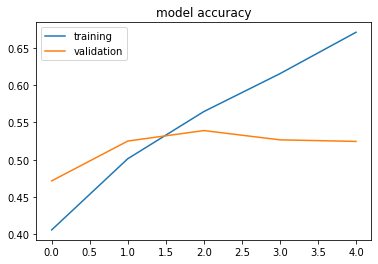

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.title('model accuracy')
plt.show()

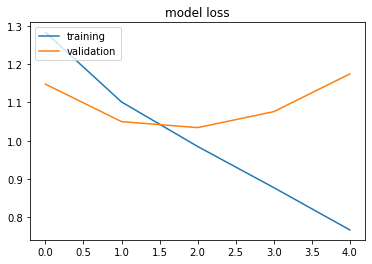

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.title('model loss')
plt.show()

In [0]:
#예측
preds = bert_model.predict(test_x)

In [29]:
# 부정이면 0, 긍정이면 1 출력
preds

array([[6.6297047e-04, 9.3345400e-03, 8.5403837e-02, 5.7676530e-01,
        3.2783335e-01],
       [7.2181359e-04, 3.2187277e-03, 1.1878408e-02, 2.8079078e-01,
        7.0339030e-01],
       [4.3449462e-03, 7.4206538e-02, 3.5625330e-01, 4.8236105e-01,
        8.2834251e-02],
       ...,
       [4.7519608e-04, 3.4373458e-03, 4.7982387e-02, 5.1000190e-01,
        4.3810323e-01],
       [7.9458117e-02, 5.1608586e-01, 2.9812634e-01, 7.7469796e-02,
        2.8859872e-02],
       [4.8493099e-04, 8.6903415e-04, 1.5455730e-03, 5.7672031e-02,
        9.3942839e-01]], dtype=float32)

In [0]:
preds_list = []
for i in range(0, len(preds)):
  preds_list.append([np.where(preds[i] == a) for a in preds[i] if a == max(preds[i])][0][0][0]) 

In [31]:
preds_list

[3,
 4,
 3,
 4,
 2,
 2,
 4,
 4,
 3,
 0,
 3,
 4,
 1,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 2,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 1,
 3,
 3,
 2,
 4,
 2,
 2,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 0,
 0,
 2,
 2,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 1,
 4,
 1,
 2,
 2,
 1,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 1,
 4,
 3,
 4,
 4,
 4,
 3,
 1,
 2,
 2,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 2,
 1,
 2,
 2,
 4,
 3,
 4,
 4,
 2,
 3,
 4,
 4,
 4,
 2,
 4,
 3,
 4,
 3,
 4,
 3,
 1,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 2,
 3,
 3,
 3,
 4,
 4,
 1,
 4,
 2,
 4,
 2,
 2,
 4,
 3,
 3,
 2,
 3,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 2,
 2,
 4,
 3,
 2,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 0,
 0,
 3,
 1,
 3,
 3,
 4,
 0,
 4,
 4,
 4,
 3,
 4,
 2,
 3,
 3,
 4,
 2,
 4,
 4,
 1,
 4,
 2,
 4,
 1,
 4,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 2,
 2,
 1,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 1,
 1,
 3,
 3,
 4,
 2,
 4,
 3,
 2,
 4,
 2,
 3,
 4,
 4,
 4,
 2,
 4,
 4,


In [32]:
y_true = test_y
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.42      0.30      0.35       179
           1       0.42      0.35      0.38       792
           2       0.53      0.30      0.39      1979
           3       0.56      0.39      0.46      4203
           4       0.55      0.73      0.63      3565

   micro avg       0.54      0.49      0.51     10718
   macro avg       0.50      0.41      0.44     10718
weighted avg       0.54      0.49      0.50     10718
 samples avg       0.49      0.49      0.49     10718



In [33]:
results = bert_model.evaluate(test_x, test_y)
print('Test accuracy: ', results[1])

10718/10718 [==============================] - 166s 16ms/step
Test accuracy:  0.5211793184280396
